In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the Libraries for NLP
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import FreqDist
import wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# reading the data
df = pd.read_csv("imdb.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Processing the "review" column
1. Removing the punctuation
2. Removing all the short-lettered words
3. Converting the text to lowercase
4. Removing the stopwords
5. Lemmatization


In [3]:
#removing punctuations
df["review_processed"] = df["review"].str.replace("[^A-Za-z0-9]"," ")

#reordering the columns
df = df[["review","review_processed","sentiment"]]
df

<ipython-input-3-af8b625190ce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review_processed"] = df["review"].str.replace("[^A-Za-z0-9]"," ")


,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,A wonderful little production br br The...,positive
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,Basically there s a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei s Love in the Time of Money is...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",Bad plot bad dialogue bad acting idiotic di...,negative
49997,I am a Catholic taught in parochial elementary...,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,I m going to have to disagree with the previou...,negative


In [4]:
#removing words having less than or equal to two letters
df["review_processed"] = df["review_processed"].apply(lambda row: " ".join([words for words in row.split() if len(words)>2]))
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One the other reviewers has mentioned that aft...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production The filming techni...,positive
2,I thought this was a wonderful way to spend ti...,thought this was wonderful way spend time too ...,positive
3,Basically there's a family where a little boy ...,Basically there family where little boy Jake t...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei Love the Time Money visually stu...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,thought this movie did down right good job was...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,Catholic taught parochial elementary schools n...,negative
49998,I'm going to have to disagree with the previou...,going have disagree with the previous comment ...,negative


In [5]:
#converting the text to lowercase
df["review_processed"] = df["review_processed"].apply(lambda row: row.lower())
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,one the other reviewers has mentioned that aft...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production the filming techni...,positive
2,I thought this was a wonderful way to spend ti...,thought this was wonderful way spend time too ...,positive
3,Basically there's a family where a little boy ...,basically there family where little boy jake t...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love the time money visually stu...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,thought this movie did down right good job was...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,catholic taught parochial elementary schools n...,negative
49998,I'm going to have to disagree with the previou...,going have disagree with the previous comment ...,negative


In [6]:
#removing the stopwords

stop_words = stopwords.words("english")
add_words = ["one","make","thought","movie","film","plot","character","mentioned","expects","going","star trek","peter mattei","taught","catholic"]
stop_words.extend(add_words)
def remove_stopwords(sentence):
  words = word_tokenize(sentence)
  return " ".join([word for word in words if word not in stop_words])

df["review_processed"] = df["review_processed"].apply(lambda row: remove_stopwords(row))
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewers watching episode hooked right exactl...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,wonderful way spend time hot summer weekend si...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,right good job creative original first expecti...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad bad dialogue bad acting idiotic directing ...,negative
49997,I am a Catholic taught in parochial elementary...,parochial elementary schools nuns jesuit pries...,negative
49998,I'm going to have to disagree with the previou...,disagree previous comment side maltin second r...,negative


In [7]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith("N"):
    return wordnet.NOUN
  elif nltk_tag.startswith("J"):
    return wordnet.ADJ
  elif nltk_tag.startswith("V"):
    return wordnet.VERB
  elif nltk_tag.startswith("R"):
    return wordnet.ADV
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = pos_tag(word_tokenize(sentence))

  #returning a tuple with word and wordnet tag by applying the function on nltk_tagged
  wordnet_tagged = map(lambda x: (x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged )
  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)

df["review_processed"] = df["review_processed"].apply(lambda row: lemmatize_sentence(row))
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewer watch episode hook right exactly happ...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production film technique una...,positive
2,I thought this was a wonderful way to spend ti...,wonderful way spend time hot summer weekend si...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,right good job creative original first expect ...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad bad dialogue bad act idiotic direct annoy ...,negative
49997,I am a Catholic taught in parochial elementary...,parochial elementary school nuns jesuit priest...,negative
49998,I'm going to have to disagree with the previou...,disagree previous comment side maltin second r...,negative


**Frequency plot**

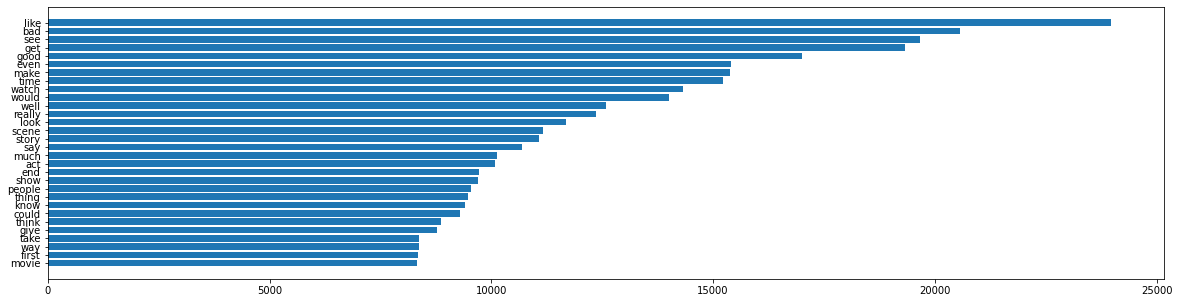

In [8]:
word_freq_df = df.loc[df["sentiment"]=="negative",:]
neg_words = " ".join([text for text in word_freq_df["review_processed"]])
neg_words = neg_words.split()

words_freq = FreqDist(neg_words)
words_count_df = pd.DataFrame({"words":list(words_freq.keys()), "count":list(words_freq.values())})
words_count_df = words_count_df.nlargest(columns="count",n=30)
words_count_df.sort_values("count",inplace=True)

#plotting the words_count_df
plt.figure(figsize=(20,5))
plt.barh(words_count_df["words"],width= words_count_df["count"])
plt.show()

**WordCloud**

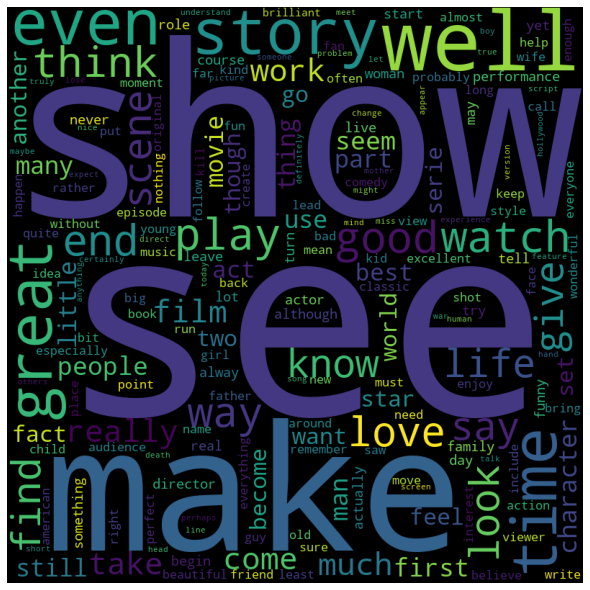

In [9]:
pos_words = df.loc[df["sentiment"]=="positive",:]
all_pos_words = " ".join([text for text in pos_words["review_processed"]])
word_cloud = WordCloud(width = 800 , height = 800 , 
                       min_font_size=10,
                       background_color="black").generate(all_pos_words)

#plotting wordcloud
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

**Bag of Words Model**

In [10]:
tfidf = TfidfVectorizer(max_features=2500)

X =  tfidf.fit_transform(df.review_processed).toarray()
feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(X,columns=feature_names)


y = df.sentiment.map({"positive":1,"negative":0}).values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

df_tfidf

,000,100,1950,1970,1980,2001,70s,80s,abandon,ability,...,yeah,year,yell,yes,yet,york,young,youth,zero,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.066077,0.0,0.0,0.0,0.000000,0.078657,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.315739
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.118461,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


**Building the ML-Models**

In [11]:
#Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

In [12]:
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,feature_names)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
107,0.135223,bad
1373,0.041943,waste
576,0.036273,great
102,0.019275,awful
452,0.016120,excellent
...,...,...
264,0.000033,concert
306,0.000033,criminal
913,0.000033,park
625,0.000033,hook


Accuracy Score = 0.716
AUC_ROC = 0.7160078465039564


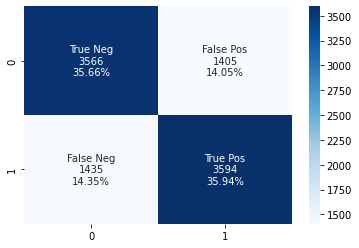

In [13]:
#Confusion Matrix  
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(f'Accuracy Score = {accuracy_score(y_test,y_pred_dt)}')
print(f'AUC_ROC = {roc_auc_score(y_test,y_pred_dt)}')

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = [val for val in cm_dt.flatten()]
group_percentages = [f'{percent:0.2%}' for percent in (cm_dt.flatten()/np.sum(cm_dt))]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]

labels= np.asarray(labels).reshape(2,2)
_=sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Blues')

In [14]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

y_pred_GNB = GNB.predict(X_test)

print(f'Accuracy score GaussianNB = {accuracy_score(y_test,y_pred_GNB)}')
print(f'AUC_ROC GNB = {roc_auc_score(y_test,y_pred_GNB)}')

Accuracy score GaussianNB = 0.8095
AUC_ROC GNB = 0.8095022916570913


In [15]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print(f'Accuracy_Score = {accuracy_score(y_test,rf_pred)}') 
print(f'AUROC = {roc_auc_score(y_test,rf_pred)}')

Accuracy_Score = 0.8421
AUROC = 0.8421393495677195


In [17]:
from xgboost import XGBClassifier,XGBRFClassifier

XGBRF = XGBRFClassifier()
XGBRF.fit(X_train,y_train)

XGBRF_pred = XGBRF.predict(X_test)
print(f'Accuracy_Score = {accuracy_score(y_test,XGBRF_pred)}') 
print(f'AUROC = {roc_auc_score(y_test,XGBRF_pred)}') 

Accuracy_Score = 0.6843
AUROC = 0.6832610049002048


In [18]:
XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)

XGBC_pred = XGBC.predict(X_test)
print(f'Accuracy_Score = {accuracy_score(y_test,XGBC_pred)}') 
print(f'AUROC = {roc_auc_score(y_test,XGBC_pred)}')

Accuracy_Score = 0.8025
AUROC = 0.8021737651254588


1. Random Forest Classifier gave 84% of accuracy score
